<a href="https://colab.research.google.com/github/faruk17035/3rd-Work/blob/main/ROC_curve%2BPF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
from pandas import read_excel
file_name = '/content/gdrive/MyDrive/Enzyme A+X.xlsx' 
df = pd.read_excel(file_name, index_col=0)
print(df.head()) # print the first 5 rows

            PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  PubchemFP6  \
PubchemFP1                                                               
1                    1           0           0           0           0   
1                    1           0           0           0           0   
1                    1           1           0           0           0   
1                    1           1           0           0           0   
1                    1           0           0           0           0   

            PubchemFP7  PubchemFP8  PubchemFP9  PubchemFP10  PubchemFP11  ...  \
PubchemFP1                                                                ...   
1                    0           0           0            1            1  ...   
1                    0           0           0            1            1  ...   
1                    0           0           0            1            1  ...   
1                    0           0           0            1            1  ..

In [ ]:
features = np.array(df.columns[:-1])
target = 'Target'

In [ ]:
X = df[features]
y = df[target]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 50)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(6525, 1280)
(1632, 1280)


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D

from tensorflow.keras.optimizers import Adam

import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = X_train.reshape(6525, 1280,1)
X_test = X_test.reshape(1632, 1280, 1)

In [ ]:
epochs =50
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape = (1280,1))) ##1st conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))  #2nd Conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.3))

model.add(Flatten())    #Flattening
model.add(Dense(64, activation='relu'))  ##fully connected layer
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))   #output layer

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, batch_size=32,validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
204/204 [==============================] - 17s 10ms/step - loss: 0.4768 - accuracy: 0.7939 - val_loss: 0.5139 - val_accuracy: 0.8315
Epoch 2/50
204/204 [==============================] - 2s 9ms/step - loss: 0.3436 - accuracy: 0.8601 - val_loss: 0.3525 - val_accuracy: 0.8793
Epoch 3/50
204/204 [==============================] - 2s 9ms/step - loss: 0.2935 - accuracy: 0.8818 - val_loss: 0.2985 - val_accuracy: 0.9026
Epoch 4/50
204/204 [==============================] - 2s 9ms/step - loss: 0.2552 - accuracy: 0.8985 - val_loss: 0.2703 - val_accuracy: 0.9001
Epoch 5/50
204/204 [==============================] - 2s 9ms/step - loss: 0.2317 - accuracy: 0.9094 - val_loss: 0.2581 - val_accuracy: 0.9105
Epoch 6/50
204/204 [==============================] - 2s 9ms/step - loss: 0.2163 - accuracy: 0.9179 - val_loss: 0.2555 - val_accuracy: 0.9069
Epoch 7/50
204/204 [==============================] - 2s 9ms/step - loss: 0.2025 - accuracy: 0.9225 - val_loss: 0.2452 - val_accuracy: 0.9203
Epoc

In [ ]:
#y_pred = model.predict(X_train).ravel()
from sklearn.metrics import roc_curve
y_pred_cnn1 = model.predict(X_test).ravel()
fpr_1, tpr_1, thresholds = roc_curve(y_test, y_pred_cnn1)
from sklearn.metrics import auc
auc_score1 = auc(fpr_1, tpr_1)
auc_score1

0.9716337506917543

## 2

In [ ]:
import pandas as pd
from pandas import read_excel
file_name = '/content/gdrive/MyDrive/Enzyme A+X.xlsx' 
df = pd.read_excel(file_name, index_col=0)
features = np.array(df.columns[:-1])
target = 'Target'
X = df[features]
y = df[target]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(6525, 1280)
(1632, 1280)


In [ ]:
### Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train = X_train.reshape(6525, 1280,1)
X_test = X_test.reshape(1632, 1280, 1)

In [ ]:
epochs =10
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape = (1280,1))) ##1st conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))  #2nd Conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.3))

model.add(Flatten())    #Flattening
model.add(Dense(64, activation='relu'))  ##fully connected layer
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))   #output layer

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, batch_size=32,validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
204/204 [==============================] - 3s 10ms/step - loss: 0.4890 - accuracy: 0.7815 - val_loss: 0.5490 - val_accuracy: 0.8297
Epoch 2/10
204/204 [==============================] - 2s 9ms/step - loss: 0.3546 - accuracy: 0.8526 - val_loss: 0.3775 - val_accuracy: 0.8609
Epoch 3/10
204/204 [==============================] - 2s 9ms/step - loss: 0.3087 - accuracy: 0.8806 - val_loss: 0.3082 - val_accuracy: 0.8830
Epoch 4/10
204/204 [==============================] - 2s 9ms/step - loss: 0.2739 - accuracy: 0.8939 - val_loss: 0.2879 - val_accuracy: 0.9013
Epoch 5/10
204/204 [==============================] - 2s 9ms/step - loss: 0.2409 - accuracy: 0.9079 - val_loss: 0.2653 - val_accuracy: 0.9020
Epoch 6/10
204/204 [==============================] - 2s 9ms/step - loss: 0.2296 - accuracy: 0.9103 - val_loss: 0.2546 - val_accuracy: 0.9062
Epoch 7/10
204/204 [==============================] - 2s 9ms/step - loss: 0.2108 - accuracy: 0.9162 - val_loss: 0.2441 - val_accuracy: 0.9087
Epoch

In [ ]:
#y_pred = model.predict(X_train).ravel()
from sklearn.metrics import roc_curve
y_pred_cnn2 = model.predict(X_test).ravel()
fpr_2, tpr_2, thresholds = roc_curve(y_test, y_pred_cnn2)
from sklearn.metrics import auc
auc_score2 = auc(fpr_2, tpr_2)
auc_score2

0.9599440601858482

## 3

In [ ]:
import pandas as pd
from pandas import read_excel
file_name = '/content/gdrive/MyDrive/Enzyme A+X.xlsx' 
df = pd.read_excel(file_name, index_col=0)
features = np.array(df.columns[:-1])
target = 'Target'
X = df[features]
y = df[target]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 100)
print(X_train.shape)
print(X_test.shape)

(6525, 1280)
(1632, 1280)


In [ ]:
print(X_train.shape)
print(X_test.shape)

(6525, 1280)
(1632, 1280)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = X_train.reshape(6525, 1280,1)
X_test = X_test.reshape(1632, 1280, 1)

In [ ]:
epochs =10
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape = (1280,1))) ##1st conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))  #2nd Conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.3))

model.add(Flatten())    #Flattening
model.add(Dense(64, activation='relu'))  ##fully connected layer
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))   #output layer

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, batch_size=32,validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
204/204 [==============================] - 4s 10ms/step - loss: 0.5105 - accuracy: 0.7733 - val_loss: 0.5893 - val_accuracy: 0.7004
Epoch 2/10
204/204 [==============================] - 2s 9ms/step - loss: 0.3816 - accuracy: 0.8375 - val_loss: 0.3999 - val_accuracy: 0.8597
Epoch 3/10
204/204 [==============================] - 2s 9ms/step - loss: 0.3285 - accuracy: 0.8578 - val_loss: 0.3052 - val_accuracy: 0.8830
Epoch 4/10
204/204 [==============================] - 2s 9ms/step - loss: 0.3047 - accuracy: 0.8589 - val_loss: 0.2798 - val_accuracy: 0.8873
Epoch 5/10
204/204 [==============================] - 2s 9ms/step - loss: 0.2740 - accuracy: 0.8703 - val_loss: 0.2819 - val_accuracy: 0.8817
Epoch 6/10
204/204 [==============================] - 2s 9ms/step - loss: 0.2627 - accuracy: 0.8779 - val_loss: 0.2582 - val_accuracy: 0.8946
Epoch 7/10
204/204 [==============================] - 2s 9ms/step - loss: 0.2490 - accuracy: 0.8898 - val_loss: 0.2532 - val_accuracy: 0.8983
Epoch

In [ ]:
#y_pred = model.predict(X_train).ravel()
from sklearn.metrics import roc_curve
y_pred_cnn3 = model.predict(X_test).ravel()
fpr_3, tpr_3, thresholds = roc_curve(y_test, y_pred_cnn3)
from sklearn.metrics import auc
auc_score3 = auc(fpr_3, tpr_3)
auc_score3

0.9613344555087603

## 4

In [ ]:
import pandas as pd
from pandas import read_excel
file_name = '/content/gdrive/MyDrive/Enzyme A+X.xlsx' 
df = pd.read_excel(file_name, index_col=0)
features = np.array(df.columns[:-1])
target = 'Target'
X = df[features]
y = df[target]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(6525, 1280)
(1632, 1280)


In [ ]:
print(X_train.shape)
print(X_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(6525, 1280,1)
X_test = X_test.reshape(1632, 1280, 1)

(6525, 1280)
(1632, 1280)


In [ ]:
epochs =15
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape = (1280,1))) ##1st conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))  #2nd Conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.3))

model.add(Flatten())    #Flattening
model.add(Dense(64, activation='relu'))  ##fully connected layer
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))   #output layer

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, batch_size=32,validation_data=(X_test, y_test), verbose=1)

Epoch 1/15
204/204 [==============================] - 3s 10ms/step - loss: 0.5288 - accuracy: 0.7615 - val_loss: 0.5819 - val_accuracy: 0.7892
Epoch 2/15
204/204 [==============================] - 2s 9ms/step - loss: 0.3840 - accuracy: 0.8132 - val_loss: 0.3955 - val_accuracy: 0.8462
Epoch 3/15
204/204 [==============================] - 2s 9ms/step - loss: 0.3461 - accuracy: 0.8325 - val_loss: 0.3489 - val_accuracy: 0.8738
Epoch 4/15
204/204 [==============================] - 2s 9ms/step - loss: 0.3119 - accuracy: 0.8582 - val_loss: 0.3159 - val_accuracy: 0.8732
Epoch 5/15
204/204 [==============================] - 2s 10ms/step - loss: 0.2881 - accuracy: 0.8671 - val_loss: 0.3157 - val_accuracy: 0.8811
Epoch 6/15
204/204 [==============================] - 3s 13ms/step - loss: 0.2699 - accuracy: 0.8680 - val_loss: 0.2859 - val_accuracy: 0.8977
Epoch 7/15
204/204 [==============================] - 2s 9ms/step - loss: 0.2592 - accuracy: 0.8788 - val_loss: 0.2855 - val_accuracy: 0.8971
Epo

In [ ]:
#y_pred = model.predict(X_train).ravel()
from sklearn.metrics import roc_curve
y_pred_cnn4 = model.predict(X_test).ravel()
fpr_4, tpr_4, thresholds = roc_curve(y_test, y_pred_cnn4)
from sklearn.metrics import auc
auc_score4 = auc(fpr_4, tpr_4)
auc_score4

0.9542870391070704

# 5

In [ ]:
import pandas as pd
from pandas import read_excel
file_name = '/content/gdrive/MyDrive/Enzyme A+X.xlsx' 
df = pd.read_excel(file_name, index_col=0)
features = np.array(df.columns[:-1])
target = 'Target'
X = df[features]
y = df[target]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 58)
print(X_train.shape)
print(X_test.shape)

(6525, 1280)
(1632, 1280)


In [ ]:
print(X_train.shape)
print(X_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(6525, 1280,1)
X_test = X_test.reshape(1632, 1280, 1)

(6525, 1280)
(1632, 1280)


In [ ]:
epochs =20
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape = (1280,1))) ##1st conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))  #2nd Conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.3))

model.add(Flatten())    #Flattening
model.add(Dense(64, activation='relu'))  ##fully connected layer
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))   #output layer

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, batch_size=32,validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
204/204 [==============================] - 3s 10ms/step - loss: 0.8751 - accuracy: 0.6708 - val_loss: 0.6348 - val_accuracy: 0.6403
Epoch 2/20
204/204 [==============================] - 2s 9ms/step - loss: 0.5475 - accuracy: 0.6719 - val_loss: 0.5570 - val_accuracy: 0.6403
Epoch 3/20
204/204 [==============================] - 2s 9ms/step - loss: 0.5011 - accuracy: 0.6733 - val_loss: 0.4837 - val_accuracy: 0.6403
Epoch 4/20
204/204 [==============================] - 2s 9ms/step - loss: 0.4768 - accuracy: 0.7149 - val_loss: 0.4935 - val_accuracy: 0.8113
Epoch 5/20
204/204 [==============================] - 2s 9ms/step - loss: 0.4765 - accuracy: 0.7502 - val_loss: 0.4681 - val_accuracy: 0.8217
Epoch 6/20
204/204 [==============================] - 2s 9ms/step - loss: 0.4495 - accuracy: 0.7706 - val_loss: 0.4505 - val_accuracy: 0.8254
Epoch 7/20
204/204 [==============================] - 2s 9ms/step - loss: 0.4253 - accuracy: 0.7897 - val_loss: 0.4354 - val_accuracy: 0.8462
Epoch

In [ ]:
#y_pred = model.predict(X_train).ravel()
from sklearn.metrics import roc_curve
y_pred_cnn5 = model.predict(X_test).ravel()
fpr_5, tpr_5, thresholds = roc_curve(y_test, y_pred_cnn5)
from sklearn.metrics import auc
auc_score5 = auc(fpr_5, tpr_5)
auc_score5

0.9383394602349144

## 6

In [ ]:
import pandas as pd
from pandas import read_excel
file_name = '/content/gdrive/MyDrive/Enzyme A+X.xlsx' 
df = pd.read_excel(file_name, index_col=0)
features = np.array(df.columns[:-1])
target = 'Target'
X = df[features]
y = df[target]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 500)
print(X_train.shape)
print(X_test.shape)

(6525, 1280)
(1632, 1280)


In [ ]:
print(X_train.shape)
print(X_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(6525, 1280,1)
X_test = X_test.reshape(1632, 1280, 1)

(6525, 1280)
(1632, 1280)


In [ ]:
epochs =40
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape = (1280,1))) ##1st conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))  #2nd Conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.3))

model.add(Flatten())    #Flattening
model.add(Dense(64, activation='relu'))  ##fully connected layer
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))   #output layer

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, batch_size=32,validation_data=(X_test, y_test), verbose=1)

Epoch 1/40
204/204 [==============================] - 3s 10ms/step - loss: 0.2356 - accuracy: 0.9028 - val_loss: 0.4015 - val_accuracy: 0.9007
Epoch 2/40
204/204 [==============================] - 2s 9ms/step - loss: 0.2332 - accuracy: 0.9054 - val_loss: 0.4008 - val_accuracy: 0.9026
Epoch 3/40
204/204 [==============================] - 2s 9ms/step - loss: 0.2303 - accuracy: 0.9059 - val_loss: 0.4018 - val_accuracy: 0.9044
Epoch 4/40
204/204 [==============================] - 2s 9ms/step - loss: 0.2338 - accuracy: 0.9036 - val_loss: 0.4005 - val_accuracy: 0.9062
Epoch 5/40
204/204 [==============================] - 2s 9ms/step - loss: 0.2248 - accuracy: 0.9116 - val_loss: 0.3984 - val_accuracy: 0.9069
Epoch 6/40
204/204 [==============================] - 2s 9ms/step - loss: 0.2166 - accuracy: 0.9143 - val_loss: 0.3989 - val_accuracy: 0.9087
Epoch 7/40
204/204 [==============================] - 2s 9ms/step - loss: 0.2188 - accuracy: 0.9133 - val_loss: 0.4008 - val_accuracy: 0.9081
Epoch

In [ ]:
#y_pred = model.predict(X_train).ravel()
from sklearn.metrics import roc_curve
y_pred_cnn6 = model.predict(X_test).ravel()
fpr_6, tpr_6, thresholds = roc_curve(y_test, y_pred_cnn6)
from sklearn.metrics import auc
auc_score6 = auc(fpr_6, tpr_6)
auc_score6

0.9499690066892514

In [ ]:
#1 .9716
#2 0.9599
#3 0.961334
#4 0.95428
#5 0.93833
#6 0.94996
auc_score1 = 0.974
auc_score2 = 0.966
auc_score3 = 0.973
auc_score4 = 0.971
auc_score6 = 0.951
auc_score5 = 0.941

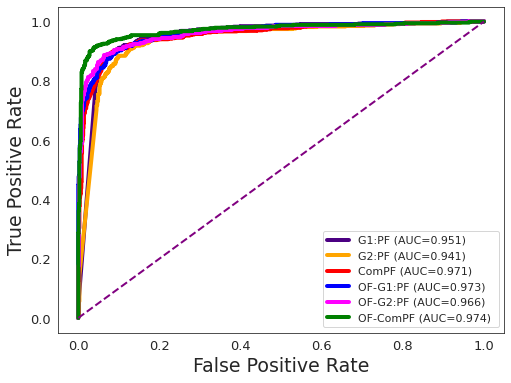

In [ ]:
sns.set_style("white")
plt.figure(figsize=(8,6))

plt.plot(fpr_6,tpr_6, color = "indigo", label = "G1:PF (AUC=%0.3f) " %auc_score6, lw = 4)
plt.plot(fpr_5,tpr_5, color = "orange", label = "G2:PF (AUC=%0.3f) " %auc_score5, lw = 4)
plt.plot(fpr_4,tpr_4, color = "red", label = "ComPF (AUC=%0.3f) " %auc_score4, lw = 4)
plt.plot(fpr_3,tpr_3, color = "blue", label = "OF-G1:PF (AUC=%0.3f) " %auc_score3, lw = 4)

plt.plot(fpr_2,tpr_2, color = "magenta", label = "OF-G2:PF (AUC=%0.3f) " %auc_score2, lw = 4)
plt.plot(fpr_1,tpr_1, color = "green", label = "OF-ComPF (AUC=%0.3f) " %auc_score1, lw = 4)
#plt.plot(fpr_7,tpr_7, color = "cyan", label = "Glove + FastText +Word2vec - %0.2f " %auc_score7, lw = 4)

plt.plot([0,1], [0,1], color = 'purple', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontsize = 19)
plt.ylabel('True Positive Rate', fontsize=19)
#plt.title('Result of CNN without feature selection', fontsize=22)
plt.legend(loc = "lower right", fontsize=11)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('ROC_all',dpi=700)
plt.show()